In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


**Loading data into the dataset**

In [3]:
df=pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

**Observing sample records in the dataset**

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Checking the null values column wise**

In [20]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
total score                    0
dtype: int64

**Adding a new column named, total score which sums the scores of math, reading and writing**

In [5]:
df['total score'] = df.loc[:,['math score', 'reading score', 'writing score']].sum(axis=1)

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [7]:
print(' Number of records: {} \n Number of columns: {}'.format(df.shape[0], df.shape[1]))

 Number of records: 1000 
 Number of columns: 9


In [8]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
print('The highest score in maths is {}'.format(df['math score'].max()))
print('The highest score in reading is {}'.format(df['reading score'].max()))
print('The highest score in writing is {}'.format(df['writing score'].max()))

print('The highest total score is {}'.format(df['total score'].max()))

The highest score in maths is 100
The highest score in reading is 100
The highest score in writing is 100
The highest total score is 300


In [10]:
print('The average score in maths is {}'.format(np.mean(df['math score'])))
print('The average score in reading is {}'.format(np.mean(df['reading score'])))
print('The average score in writing is {}'.format(np.mean(df['writing score'])))

print('The average score in total is {}'.format(np.mean(df['total score'])))

The average score in maths is 66.089
The average score in reading is 69.169
The average score in writing is 68.054
The average score in total is 203.312


**Observing the percentage of students whose scores in the three course(math, reading and writing) have/haven't crossed 50**

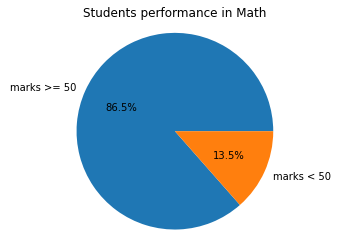

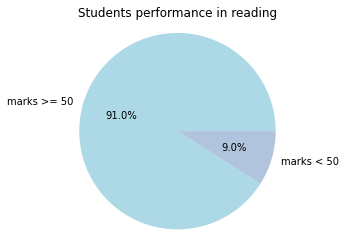

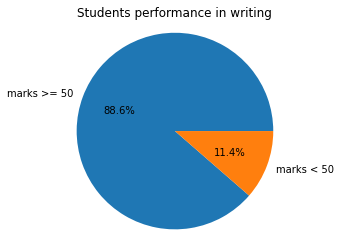

In [11]:
m_a = df.loc[df['math score'] >= 50, 'math score'] 
m_b = df.loc[df['math score'] < 50, 'math score']
len_m_a = len(m_a)
len_m_b = len(m_b)
my_labels = 'marks >= 50','marks < 50'
plt.pie([len_m_a, len_m_b], labels=my_labels, autopct='%1.1f%%')
plt.title('Students performance in Math')
plt.axis('equal')
plt.show()

r_a = df.loc[df['reading score'] >= 50, 'reading score'] 
r_b = df.loc[df['reading score'] < 50, 'reading score']
len_r_a = len(r_a)
len_r_b = len(r_b)
my_labels = 'marks >= 50','marks < 50'
my_colors = ['lightblue', 'lightsteelblue']
plt.pie([len_r_a, len_r_b], labels=my_labels, autopct='%1.1f%%', colors=my_colors)
plt.title('Students performance in reading')
plt.axis('equal')
plt.show()


w_a = df.loc[df['writing score'] >= 50, 'writing score'] 
w_b = df.loc[df['writing score'] < 50, 'writing score']
len_w_a = len(w_a)
len_w_b = len(w_b)
my_labels = 'marks >= 50','marks < 50'
my_colors = ['yellow', 'red']
plt.pie([len_w_a, len_w_b], labels=my_labels, autopct='%1.1f%%')
plt.title('Students performance in writing')
plt.axis('equal')
plt.show()

**Gender wise, test preparation course completion**

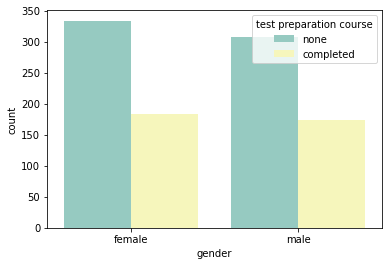

In [15]:
ax = sns.countplot(x='gender', data = df, hue = 'test preparation course', palette="Set3")

**Observing the top scorers(score > 85) in the math course**